## Linear Regression - Prediction Of Delivery Time

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Loading the delivery_time dataset
df = pd.read_csv('/kaggle/input/delivery-timecsv/delivery_time.csv')



### EDA and Data Visualization

In [29]:
print(df.head())
print(df.isnull().sum())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
Delivery Time    0
Sorting Time     0
dtype: int64


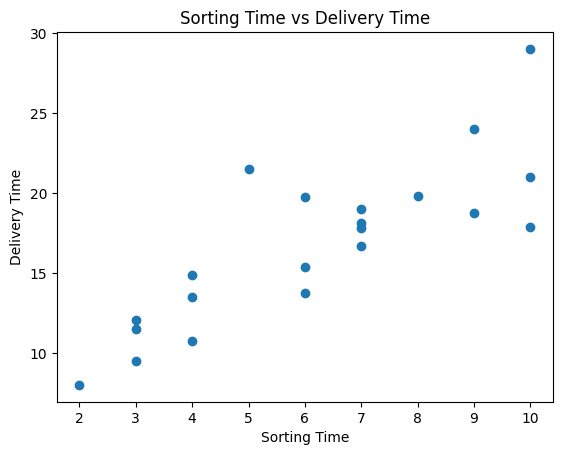

In [30]:
# Scatter plot to visualize the relationship between Sorting Time and Delivery Time
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Sorting Time vs Delivery Time')
plt.show()

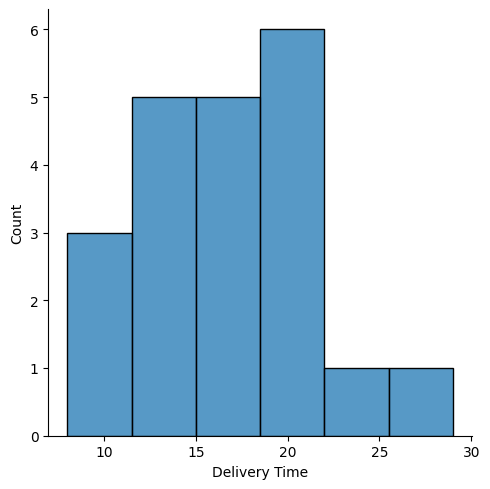

In [31]:
sns.displot(df['Delivery Time'])

<AxesSubplot: xlabel='Sorting Time', ylabel='Count'>

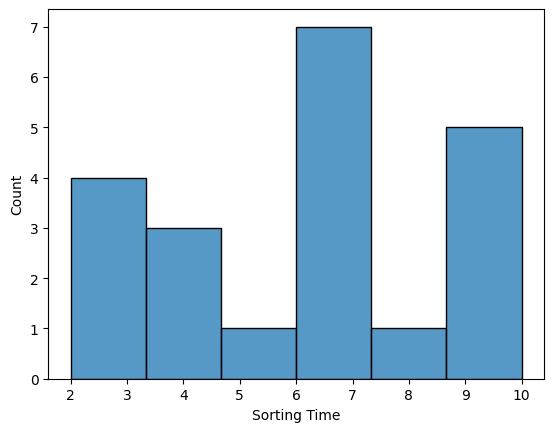

In [32]:
sns.histplot(df['Sorting Time'])

### Correlation Analysis


In [33]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot: xlabel='Sorting Time', ylabel='Delivery Time'>

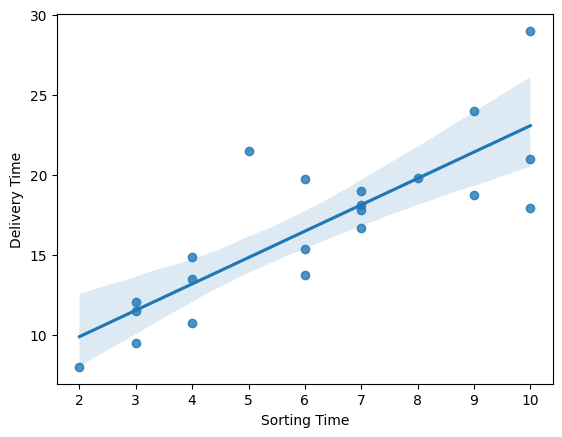

In [34]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

#### **Feature Engineering**

In [35]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Splitting the data into training and testing sets

In [36]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

#### **Finding Coefficient parameters**

In [37]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

#### **Finding tvalues and pvalues**

In [38]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

#### **Finding Rsquared Values**

In [39]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### **Model Predictions**

#### Manual prediction for say sorting time 5

In [40]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

#### Automatic Prediction for say sorting time 5, 8

In [41]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [42]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [43]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64